In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from tensorflow.keras import datasets, layers, models, utils
import numpy as np
import matplotlib.pyplot as plt

Import csv files and load up a pandas dataframe

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Train.csv to Train.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Test.csv to Test.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving airqo_metadata.csv to airqo_metadata.csv


In [ ]:
df = pd.read_csv("Train.csv")
df

NameError: ignored

Expand column lists into more columns

In [ ]:
col = ["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press"]
new_dfs= []
ffdf = pd.read_csv("Train.csv")
for header in col:
  temp_df = pd.DataFrame(ffdf[header].str.split(',').tolist())
  for i, column in enumerate(list(temp_df.columns)):
    temp_df[column] = pd.to_numeric(temp_df[column],errors='coerce')
    temp_df[column].fillna(temp_df[column].mean(), inplace=True)
    temp_df.rename(columns={ temp_df.columns[i]: header+'_'+str(column) }, inplace = True)
    
  new_dfs.append(temp_df)
  ffdf.drop(header, axis=1, inplace=True)

new_dfs.append(df)
ffdf2 = pd.concat(new_dfs, axis=1)
ffdf2.drop("ID", axis=1, inplace=True)
ffdf2

ffdf2['location'] = pd.Categorical(ffdf2['location']).codes
fftarget = ffdf2.pop('target')
fftarget

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=[727]))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.summary()

early_stop = keras.callbacks.EarlyStopping(monitor='mse', patience=10)
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='mse',
              metrics=['mae', 'mse'])

history = model.fit(ffdf2[:(len(t_array) // 10) * 8], fftarget[:(len(t_array) // 10) * 8], epochs=1000, callbacks=[early_stop], validation_data=(ffdf2[(len(target) // 10) * 8:], fftarget[(len(target) // 10) * 8:]))

,temp_0,temp_1,temp_2,temp_3,temp_4,temp_5,temp_6,temp_7,temp_8,temp_9,temp_10,temp_11,temp_12,temp_13,temp_14,temp_15,temp_16,temp_17,temp_18,temp_19,temp_20,temp_21,temp_22,temp_23,temp_24,temp_25,temp_26,temp_27,temp_28,temp_29,temp_30,temp_31,temp_32,temp_33,temp_34,temp_35,temp_36,temp_37,temp_38,temp_39,...,atmos_press_83,atmos_press_84,atmos_press_85,atmos_press_86,atmos_press_87,atmos_press_88,atmos_press_89,atmos_press_90,atmos_press_91,atmos_press_92,atmos_press_93,atmos_press_94,atmos_press_95,atmos_press_96,atmos_press_97,atmos_press_98,atmos_press_99,atmos_press_100,atmos_press_101,atmos_press_102,atmos_press_103,atmos_press_104,atmos_press_105,atmos_press_106,atmos_press_107,atmos_press_108,atmos_press_109,atmos_press_110,atmos_press_111,atmos_press_112,atmos_press_113,atmos_press_114,atmos_press_115,atmos_press_116,atmos_press_117,atmos_press_118,atmos_press_119,atmos_press_120,location,target
0,22.923816,22.930973,22.933465,22.928579,22.918572,22.904652,22.890893,22.878355,22.868956,22.856255,22.839972,22.822462,22.805578,22.787342,22.771216,22.764116,22.765021,22.776059,22.797791,22.827766,22.857438,22.886210,22.909365,22.928038,22.943181,22.946935,22.941668,22.932446,22.923289,22.912079,22.899729,22.888372,22.877963,22.861521,22.840455,22.816759,22.793551,22.771164,22.750696,22.744308,...,89.070419,89.070413,89.070849,89.071726,89.072748,89.074198,89.075140,89.076066,89.076305,89.075925,89.074689,89.073034,89.071084,89.069366,89.067963,89.067331,89.067059,89.067425,89.068221,89.069075,89.069449,89.069794,87.777273,87.652500,87.614167,87.637500,87.717500,87.762500,87.790833,87.814167,87.858333,87.871667,87.802500,87.761667,87.743333,87.715833,87.750833,87.768333,C,45.126304
1,22.533333,21.716667,20.833333,20.983333,20.875000,20.141667,19.375000,18.791667,18.775000,18.641667,18.558333,18.533333,19.608333,21.916667,24.716667,26.658333,29.175000,30.700000,31.433333,32.333333,33.008333,33.391667,33.616667,31.091667,27.550000,26.658333,25.675000,26.425000,23.783333,22.416667,22.041667,21.008333,21.475000,21.825000,21.158333,22.308333,23.116667,22.333333,23.850000,23.825000,...,90.411667,90.470000,90.534167,90.617500,90.665833,90.668333,90.555000,90.434167,90.389167,90.391667,90.344167,90.311667,90.301667,90.368333,90.462500,90.563333,90.646667,90.678333,90.681667,90.634167,90.560000,90.511667,90.465833,90.515833,90.563333,90.603333,90.682500,90.725000,90.707500,90.682500,90.604167,90.481667,90.354167,90.272500,90.266667,90.325833,90.439167,90.529167,D,79.131702
2,28.975000,27.950000,29.600000,26.425000,22.091667,21.775000,22.333333,21.950000,20.441667,20.441667,20.950000,19.800000,19.591667,19.575000,19.516667,19.550000,19.783333,19.908333,19.516667,19.666667,20.683333,22.491667,23.708333,24.900000,26.058333,27.325000,27.866667,28.291667,22.136364,19.141667,19.991667,20.216667,20.433333,20.466667,20.800000,20.958333,20.641667,20.033333,19.825000,19.616667,...,88.536667,88.538333,88.465833,88.417500,88.385833,88.380833,88.390000,88.418333,88.450833,88.504167,88.522500,88.505000,88.433333,88.356667,88.278333,88.161667,88.059167,88.001667,87.982500,88.005833,88.064167,88.154167,88.280833,88.345833,88.419167,88.439167,88.374167,88.335000,88.287500,88.301667,88.353333,88.409167,88.448333,88.500000,88.495000,88.515833,88.475833,88.415833,A,32.661304
3,22.966667,24.266667,25.275000,25.625000,25.866667,25.091667,24.025000,22.425000,20.233333,17.416667,17.391667,17.083333,17.516667,17.825000,18.258333,17.950000,17.575000,17.425000,17.475000,16.941667,18.233333,21.166667,23.708333,24.941667,25.825000,26.691667,27.275000,27.491667,21.136364,19.650000,19.391667,19.116667,19.075000,19.541667,19.450000,19.175000,18.891667,19.058333,19.325000,19.400000,...,88.619167,88.620833,88.589167,88.595000,88.604167,88.600000,88.576667,88.589167,88.617500,88.628333,88.685000,88.665000,88.619167,88.546667,88.450000,88.342500,88.278333,88.200000,88.205000,88.212500,88.248333,88.347500,88.423333,88.480000,88.515000,88.501667,88.432500,88.36250

In [ ]:
df2['location'] = pd.Categorical(df2['location']).codes
df2['location']

0        2
1        3
2        0
3        0
4        0
        ..
15534    0
15535    4
15536    3
15537    3
15538    2
Name: location, Length: 15539, dtype: int8

In [ ]:
target = df2.pop('target')
target

0         45.126304
1         79.131702
2         32.661304
3         53.850238
4        177.418750
            ...    
15534     44.850286
15535     24.330455
15536     38.972128
15537     41.720952
15538    127.983333
Name: target, Length: 15539, dtype: float64

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=[727]))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                46592     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 50,817
Trainable params: 50,817
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='mse', patience=10)
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='mse',
              metrics=['mae', 'mse'])

history = model.fit(df2, target, epochs=1000, callbacks=[early_stop])

Epoch 1/1000
486/486 [==============================] - 1s 2ms/step - loss: 1124.0026 - mae: 22.6853 - mse: 1124.0026
Epoch 2/1000
486/486 [==============================] - 1s 2ms/step - loss: 1119.1516 - mae: 22.6797 - mse: 1119.1516
Epoch 3/1000
486/486 [==============================] - 1s 2ms/step - loss: 1129.1244 - mae: 22.6538 - mse: 1129.1244
Epoch 4/1000
486/486 [==============================] - 1s 2ms/step - loss: 1128.6613 - mae: 22.7249 - mse: 1128.6613
Epoch 5/1000
486/486 [==============================] - 1s 2ms/step - loss: 1133.7051 - mae: 22.7505 - mse: 1133.7051
Epoch 6/1000
486/486 [==============================] - 1s 2ms/step - loss: 1130.3289 - mae: 22.7439 - mse: 1130.3289
Epoch 7/1000
486/486 [==============================] - 1s 2ms/step - loss: 1111.1477 - mae: 22.5460 - mse: 1111.1477
Epoch 8/1000
486/486 [==============================] - 1s 2ms/step - loss: 1117.8452 - mae: 22.6276 - mse: 1117.8452
Epoch 9/1000
486/486 [==============================] - 

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,epoch
72,1032.767822,21.939779,1032.767822,72
73,1034.016968,21.977501,1034.016968,73
74,1036.723511,21.916523,1036.723511,74
75,1039.943237,21.978338,1039.943237,75
76,1031.531006,21.957533,1031.531006,76


The FFNN did quite poorly, as one could have guessed. The mse was ~1030, so on average each prediction was around 30 points off. The leading solutions so far have had mse ~32, so here is room for improvement. Next, I intend to use a cnn to try get a better result.

In [ ]:
df = pd.read_csv("Train.csv")
df.drop("ID", axis=1)
df['location'] = pd.Categorical(df['location']).codes
location = df.pop("location")
target = df.pop("target")

In [ ]:
df2=df
col = ["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press"]
new_dfs= []
for header in col:
  temp_df = pd.DataFrame(df2[header].str.split(',').tolist())
  for i, column in enumerate(list(temp_df.columns)):
    temp_df[column] = pd.to_numeric(temp_df[column],errors='coerce')
    temp_df[column].fillna(temp_df[column].mean(), inplace=True)
    temp_df.rename(columns={ temp_df.columns[i]: header+'_'+str(column) }, inplace = True)
    
  new_dfs.append(temp_df)
  df2.drop(header, axis=1, inplace=True)

tt = np.stack(new_dfs)
tt.shape

(6, 15539, 121)

In [ ]:
t_array = tt
t_array = t_array.transpose([1,0,2])
t_array = t_array.reshape(15539,6,121,1)

t_array_train = t_array[:(len(t_array) // 10) * 8]
t_array_val = t_array[(len(t_array) // 10) * 8:]

target_train = target[:(len(target) // 10) * 8]
target_val = target[(len(target) // 10) * 8:]
((t_array_train.shape, target_train.shape),(t_array_val.shape, target_val.shape))

(((12424, 6, 121, 1), (12424,)), ((3115, 6, 121, 1), (3115,)))

In [ ]:
Start building the CNN!

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, 2,padding='same', activation='relu', input_shape=(6,121,1)))
model.add(layers.MaxPooling2D((2,2),padding='same'))
model.add(layers.Conv2D(64, 2,padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2,2),padding='same'))
model.add(layers.Conv2D(64, 2,padding='same', activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 6, 121, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 61, 32)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 61, 64)         8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 31, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 31, 64)         16448     
_________________________________________________________________
flatten_5 (Flatten)          (None, 3968)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)               

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='mse',
              metrics=['mae','mse'])

history = model.fit(t_array_train, target_train, epochs=1000, callbacks=[early_stop], validation_data=(t_array_val, target_val))

Epoch 1/1000
115/389 [=======>......................] - ETA: 8s - loss: 2114.3098 - mae: 31.0055 - mse: 2114.3098

KeyboardInterrupt: ignored

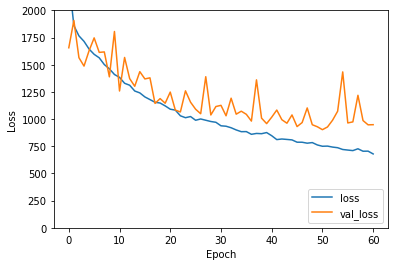

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2000])
plt.legend(loc='lower right')

OK, lets work on this a little more intelligently this time. Changes tried will be dropping of nan values and normalisation of data

In [ ]:
df = pd.read_csv("Train.csv")
df.drop("ID", axis=1)
location = df.pop("location")
target = df.pop("target")

df2 = df

col = ["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press"]
new_dfs= []
for header in col:
  temp_df = pd.DataFrame(df2[header].str.split(',').tolist())
  for i, column in enumerate(list(temp_df.columns)):
    temp_df[column] = pd.to_numeric(temp_df[column],errors='coerce')
    temp_df.rename(columns={ temp_df.columns[i]: header+'_'+str(column) }, inplace = True)

  temp_df = temp_df.T.fillna(temp_df.mean(axis=1)).T
  new_dfs.append(temp_df)
  df2.drop(header, axis=1, inplace=True)

tt = np.stack(new_dfs)
tt.shape

(6, 15539, 121)

In [ ]:
t_array = tt
t_array = t_array.transpose([1,2,0])
t_array.shape

t_array_train = t_array[:(len(t_array) // 10) * 8]
t_array_val = t_array[(len(t_array) // 10) * 8:]

target_train = target[:(len(target) // 10) * 8]
target_val = target[(len(target) // 10) * 8:]
((t_array_train.shape, target_train.shape),(t_array_val.shape, target_val.shape))

(((12424, 121, 6), (12424,)), ((3115, 121, 6), (3115,)))

Build up the demographic dataframes from location key

In [ ]:
demos = pd.read_csv("airqo_metadata.csv")
demos.drop('dist_motorway',axis=1,inplace=True)
demos.drop('Unnamed: 0',axis=1,inplace=True)

def mergeLeftInOrder(x, y, on=None):
    x = x.copy()
    x["Order"] = np.arange(len(x))
    z = x.merge(y, how='left', on=on).set_index("Order").iloc[np.arange(len(x)), :]
    return z

location_md = mergeLeftInOrder(pd.DataFrame(location), demos, 'location')
location_md.reset_index(inplace=True)
location_md.drop('location',axis=1,inplace=True)
location_md.drop('Order',axis=1,inplace=True)
for i, column in enumerate(list(location_md.columns)):
  location_md[column] = pd.to_numeric(location_md[column],errors='coerce')
  location_md[column].fillna(location_md[column].mean(), inplace=True)

location_train = location_md[:(len(location_md) // 10) * 8]
location_val = location_md[(len(location_md) // 10) * 8:]
location_md

,loc_altitude,km2,aspect,dist_trunk,dist_primary,dist_secondary,dist_tertiary,dist_unclassified,dist_residential,popn,hh,hh_cook_charcoal,hh_cook_firewood,hh_burn_waste
0,1178.3,8.5,168.7,32.885520,4794.704552,12.730489,72.459340,406.967815,13.931350,97895,26873,21316,751,9835
1,980.8,0.8,90.0,540.789488,265.896472,731.334789,339.693908,76.024389,11.601442,3596,663,7,651,99
2,1122.4,1.9,194.0,540.789488,14.695789,343.595039,575.917422,330.609776,254.307415,4763,809,508,43,142
3,1122.4,1.9,194.0,540.789488,14.695789,343.595039,575.917422,330.609776,254.307415,4763,809,508,43,142
4,1122.4,1.9,194.0,540.789488,14.695789,343.595039,575.917422,330.609776,254.307415,4763,809,508,43,142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15534,1122.4,1.9,194.0,540.789488,14.695789,343.595039,575.917422,330.609776,254.307415,4763,809,508,43,142
15535,1186.5,1.6,121.0,850.423131,908.300999,1738.872942,137.722087,449.591885,3.836589,6064,1297,985,26,43
15536,980.8,0.8,90.0,540.789488,265.896472,731.334789,339.693908,76.024389,11.601442,3596,663,7,651,99
15537,980.8,0.8,90.0,540.789488,265.896472,731.334789,339.693908,76.024389,11.601442,3596,663,7,651,99


In [ ]:
weather_input = layers.Input(shape=(121,6))
demographic_input = layers.Input(shape=14)

x = layers.BatchNormalization()(weather_input)
x = layers.Conv1D(32, 24, activation='relu')(x)
x = layers.AveragePooling1D()(x)
x = layers.Conv1D(64, 3, activation='relu')(x)
x = layers.AveragePooling1D()(x)
x = layers.Conv1D(96, 3, activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(14, activation='relu')(x)
x = keras.Model(inputs=weather_input, outputs=x)

y = layers.LayerNormalization()(demographic_input)
#y = layers.Dense(14)(demographic_input)
y = keras.Model(inputs=demographic_input, outputs=y)

combined = layers.concatenate([x.output, y.output])

z = layers.Dense(64, activation='relu')(combined)
z = layers.Dropout(0.3)(z)
z = layers.Dense(1)(z)

model = keras.Model(inputs=[x.input, y.input], outputs=z)

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 121, 6)]     0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 121, 6)       24          input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 98, 32)       4640        batch_normalization[0][0]        
__________________________________________________________________________________________________
average_pooling1d (AveragePooli (None, 49, 32)       0           conv1d[0][0]                     
____________________________________________________________________________________________

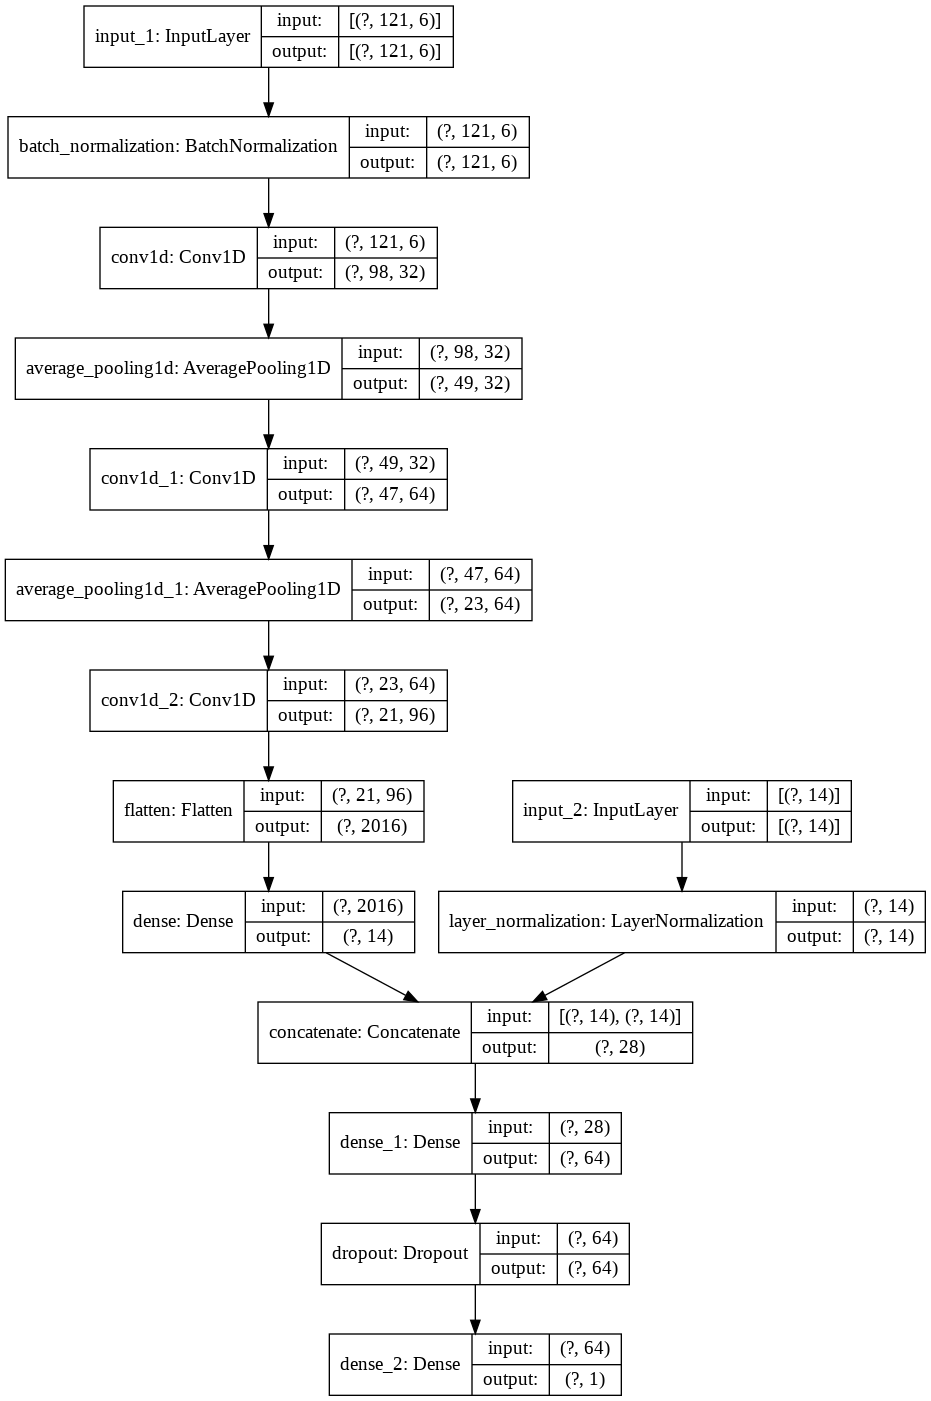

In [ ]:
tf.keras.utils.plot_model(
    model, to_file='CNNStructure.png', show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=True, dpi=96
)


In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='mse',
              metrics=['mae','mse'])

history = model.fit([t_array_train,location_train], target_train, epochs=1000, callbacks=[early_stop], validation_data=([t_array_val,location_val], target_val))

Epoch 1/1000
389/389 [==============================] - 5s 14ms/step - loss: 1652.0591 - mae: 27.0942 - mse: 1652.0591 - val_loss: 2094.7354 - val_mae: 33.4780 - val_mse: 2094.7354
Epoch 2/1000
389/389 [==============================] - 5s 14ms/step - loss: 1319.6936 - mae: 24.2292 - mse: 1319.6936 - val_loss: 1140.1936 - val_mae: 23.4588 - val_mse: 1140.1936
Epoch 3/1000
389/389 [==============================] - 5s 14ms/step - loss: 1219.3031 - mae: 23.2208 - mse: 1219.3031 - val_loss: 1118.4838 - val_mae: 21.6795 - val_mse: 1118.4838
Epoch 4/1000
389/389 [==============================] - 5s 14ms/step - loss: 1146.5802 - mae: 22.6058 - mse: 1146.5802 - val_loss: 1259.6482 - val_mae: 21.1920 - val_mse: 1259.6482
Epoch 5/1000
389/389 [==============================] - 5s 13ms/step - loss: 1108.1901 - mae: 22.0709 - mse: 1108.1901 - val_loss: 2076.2693 - val_mae: 31.1900 - val_mse: 2076.2693
Epoch 6/1000
389/389 [==============================] - 5s 13ms/step - loss: 1088.7399 - mae: 2

In [ ]:
res = model.evaluate([t_array_val,location_val], target_val)
res

98/98 [==============================] - 0s 4ms/step - loss: 699.5547 - mae: 15.8111 - mse: 699.5547


[699.5547485351562, 15.811073303222656, 699.5547485351562]

Munge Test data

In [ ]:
df = pd.read_csv("Test.csv")
df.drop("ID", axis=1)
location = df.pop("location")

df2 = df

col = ["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press"]
new_dfs= []
for header in col:
  temp_df = pd.DataFrame(df2[header].str.split(',').tolist())
  for i, column in enumerate(list(temp_df.columns)):
    temp_df[column] = pd.to_numeric(temp_df[column],errors='coerce')
    temp_df.rename(columns={ temp_df.columns[i]: header+'_'+str(column) }, inplace = True)

  temp_df = temp_df.T.fillna(temp_df.mean(axis=1)).T
  new_dfs.append(temp_df)
  df2.drop(header, axis=1, inplace=True)

test = np.stack(new_dfs)
test.shape

(6, 5035, 121)

In [ ]:
test_array = test
test_array = test_array.transpose([1,2,0])
test_array.shape

(5035, 121, 6)

In [ ]:
demos = pd.read_csv("airqo_metadata.csv")
demos.drop('dist_motorway',axis=1,inplace=True)
demos.drop('Unnamed: 0',axis=1,inplace=True)

def mergeLeftInOrder(x, y, on=None):
    x = x.copy()
    x["Order"] = np.arange(len(x))
    z = x.merge(y, how='left', on=on).set_index("Order").iloc[np.arange(len(x)), :]
    return z

location_md = mergeLeftInOrder(pd.DataFrame(location), demos, 'location')
location_md.reset_index(inplace=True)
location_md.drop('location',axis=1,inplace=True)
location_md.drop('Order',axis=1,inplace=True)
for i, column in enumerate(list(location_md.columns)):
  location_md[column] = pd.to_numeric(location_md[column],errors='coerce')
  location_md[column].fillna(location_md[column].mean(), inplace=True)

location_md

,loc_altitude,km2,aspect,dist_trunk,dist_primary,dist_secondary,dist_tertiary,dist_unclassified,dist_residential,popn,hh,hh_cook_charcoal,hh_cook_firewood,hh_burn_waste
0,1178.3,8.5,168.7,32.885520,4794.704552,12.730489,72.459340,406.967815,13.931350,97895,26873,21316,751,9835
1,1178.3,8.5,168.7,32.885520,4794.704552,12.730489,72.459340,406.967815,13.931350,97895,26873,21316,751,9835
2,980.8,0.8,90.0,375.758080,265.896472,593.524493,339.693908,76.024389,11.601442,3596,663,7,651,99
3,1178.3,8.5,168.7,32.885520,4794.704552,12.730489,72.459340,406.967815,13.931350,97895,26873,21316,751,9835
4,980.8,0.8,90.0,375.758080,265.896472,593.524493,339.693908,76.024389,11.601442,3596,663,7,651,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5030,1178.3,8.5,168.7,32.885520,4794.704552,12.730489,72.459340,406.967815,13.931350,97895,26873,21316,751,9835
5031,980.8,0.8,90.0,375.758080,265.896472,593.524493,339.693908,76.024389,11.601442,3596,663,7,651,99
5032,1186.5,1.6,121.0,850.423131,1525.649614,1738.872942,137.722087,449.591885,3.836589,6064,1297,985,26,43
5033,1122.4,1.9,194.0,375.758080,14.695789,343.595039,575.917422,330.609776,254.307415,4763,809,508,43,142


In [ ]:
predictions = model.predict([test_array, location_md])
predictions.reshape(5035)
p_df = pd.DataFrame(predictions)
p_df.rename(columns={0:'target', '':'ID'}, inplace=True)

id_indexed = []
for k in range(0,5035):
  id_indexed.append('ID_test_'+str(k))

p_df['ID'] = id_indexed
p_df.set_index('ID').to_csv("submission.csv")
files.download('submission.csv')